# 🎯 Objective

We analyzed past hotel booking data to understand why customers cancel reservations and built models to predict cancellations before they happen. This helps us protect revenue, optimize staffing, and improve guest experience.

# 🔑 Key Insights

## Cancellations are common and predictable

* A significant portion of bookings are canceled, but certain patterns make them more likely.

## Top drivers of cancellations

* Long booking lead time → More likely to cancel (plans change).

* Market segment (Online travel agency vs.Direct) → OTA bookings cancel more often.

* Few or no special requests → Lower commitment, higher risk of cancel.

* Higher average room price → More price-sensitive guests cancel more.

* Guests with parking or multiple requests → Much less likely to cancel.

## Impact on operations

* Revenue loss: cancellations reduce occupancy and force last-minute price cuts.

* Operational inefficiency: affects housekeeping, staffing, and resource planning.

* Customer experience: overbooking without good prediction risks walk-aways.

# LIBRARY IMPORT

In [1]:
import pandas as pd                          
import numpy as np                           
import matplotlib.pyplot as plt              
import seaborn as sns                        

from sklearn.model_selection import train_test_split                      
from sklearn.preprocessing import LabelEncoder,StandardScaler             
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier         
from sklearn.ensemble import RandomForestClassifier     
from xgboost import XGBClassifier                       
from sklearn.model_selection import GridSearchCV        
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score     
import warnings                    
warnings.filterwarnings('ignore')

# LOAD THE DATASET

In [2]:
data=pd.read_csv(r"C:\Users\mrasi\Desktop\Hotel cancel project\HOTEL CANCEL_newdata.csv")

In [3]:
data.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
2,INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
3,INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
4,INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled


In [4]:
data.shape

(3583, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  3583 non-null   object 
 1   lead_time                   3583 non-null   int64  
 2   market_segment_type         3583 non-null   object 
 3   no_of_special_requests      3583 non-null   int64  
 4   avg_price_per_room          3583 non-null   float64
 5   no_of_adults                3583 non-null   int64  
 6   no_of_weekend_nights        3583 non-null   int64  
 7   arrival_date                3583 non-null   object 
 8   required_car_parking_space  3583 non-null   int64  
 9   no_of_week_nights           3583 non-null   int64  
 10  booking_status              3583 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 308.0+ KB


In [6]:
data.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights
count,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000,3583.000000
mean,92.921295,0.837845,121.608049,1.998046,0.967904,0.057494,2.306726
std,73.538050,0.836892,36.899246,0.530738,0.908934,0.232816,1.575382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,96.050000,2.000000,0.000000,0.000000,1.000000
50%,81.000000,1.000000,118.650000,2.000000,1.000000,0.000000,2.000000
75%,146.000000,1.000000,143.000000,2.000000,2.000000,0.000000,3.000000
max,346.000000,5.000000,300.000000,4.000000,7.000000,1.000000,17.000000


 # DATA CLEANING

In [7]:
data.isnull().sum()

booking_id                    0
lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
arrival_date                  0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
dtype: int64

In [8]:
data[data.duplicated()]

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status


In [9]:
data.drop("booking_id",axis=1,inplace=True)

In [10]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
1,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
2,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
3,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
4,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled


In [11]:
print(data['booking_status'].unique()) 

['Not Canceled' 'Canceled']


## VISUALISE


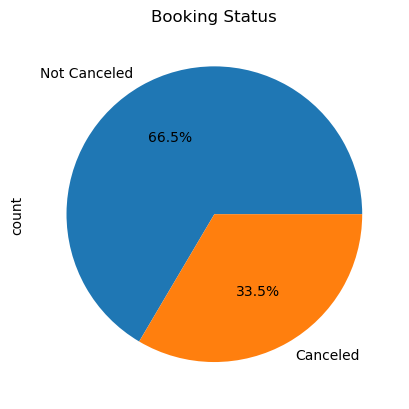

In [12]:
data['booking_status'].value_counts().plot(kind='pie',autopct="%0.1f%%")   
plt.title("Booking Status")     
plt.show()

In [13]:
num_cols= ['lead_time','avg_price_per_room']
cat_cols= ['market_segment_type','no_of_special_requests','no_of_adults','no_of_weekend_nights', 
           'required_car_parking_space', 'no_of_week_nights','booking_status']

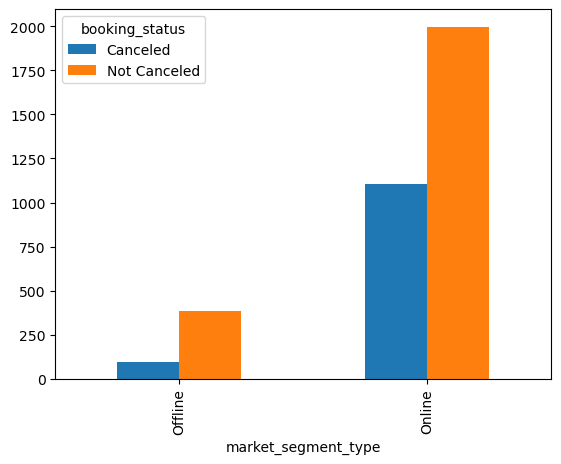

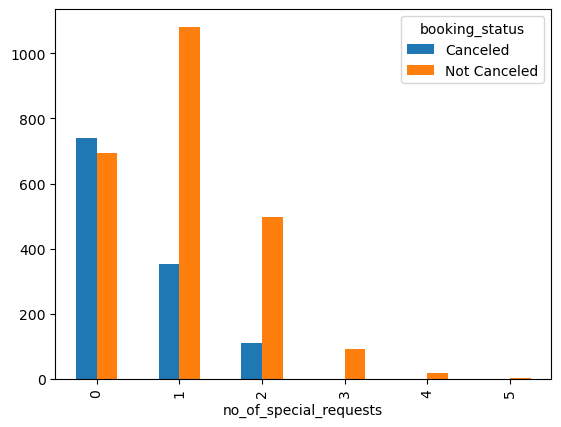

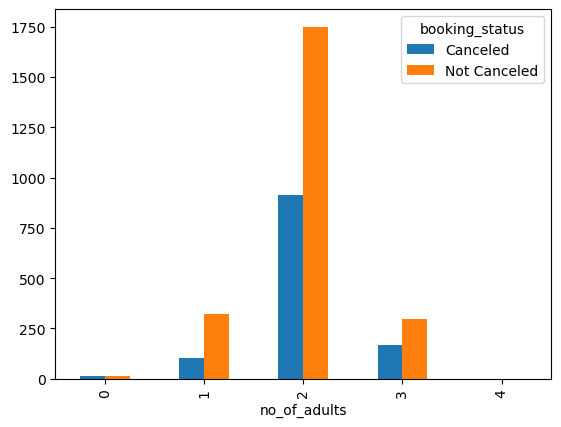

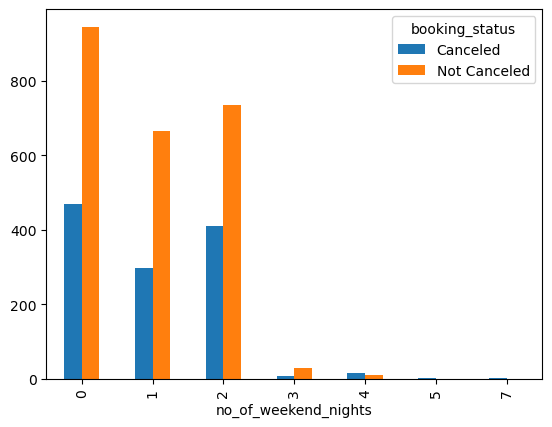

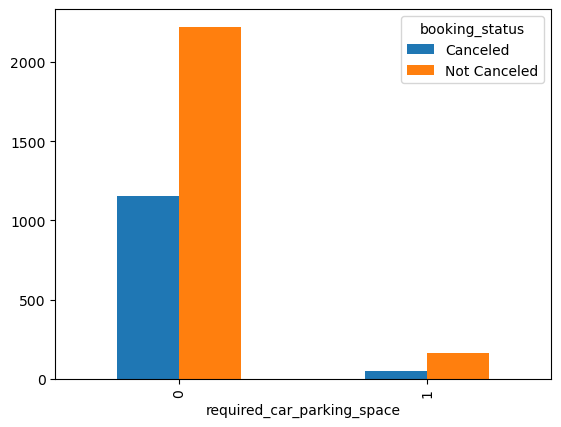

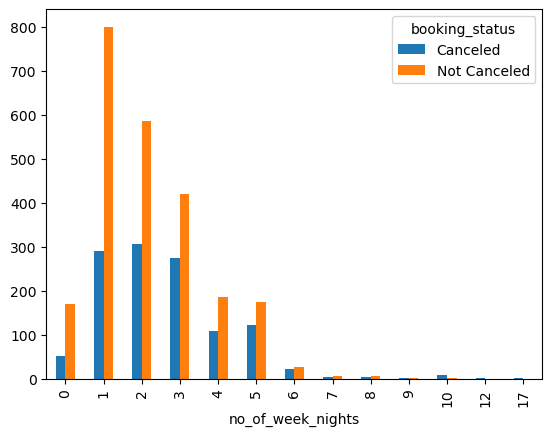

In [14]:
for i in cat_cols:
    if i!= 'booking_status':
        pd.crosstab(index=data[i],columns=data['booking_status']).plot(kind='bar')

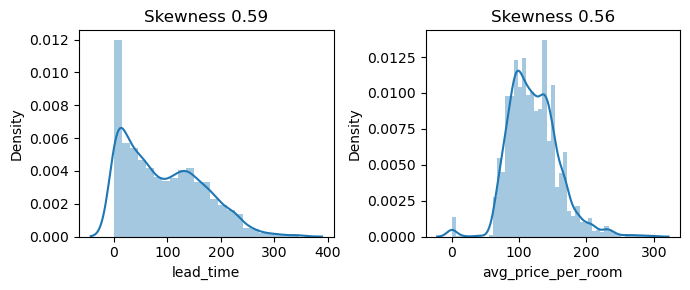

In [15]:
#UNIVARIATE
t=1
plt.figure(figsize=(7,3))
for i in num_cols:                                             
    plt.subplot(1,2,t)                                         
    sns.distplot(data[i])                                      
    plt.title(f"Skewness {np.round(data[i].skew(),2)}")       
    t += 1
plt.tight_layout()                                             
plt.show()

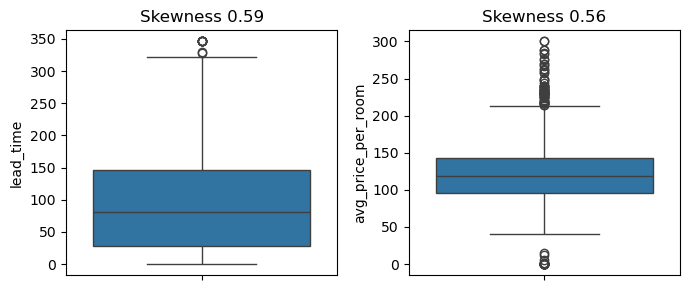

In [16]:
t=1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data[i])                                  
    plt.title(f"Skewness {np.round(data[i].skew(),2)}")
    t += 1
plt.tight_layout()
plt.show()

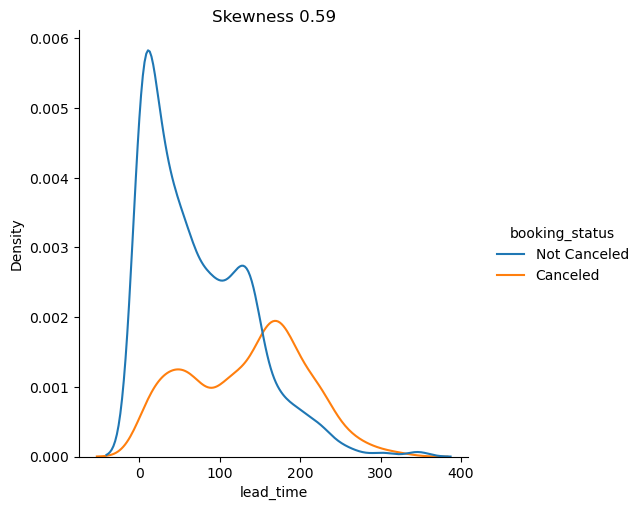

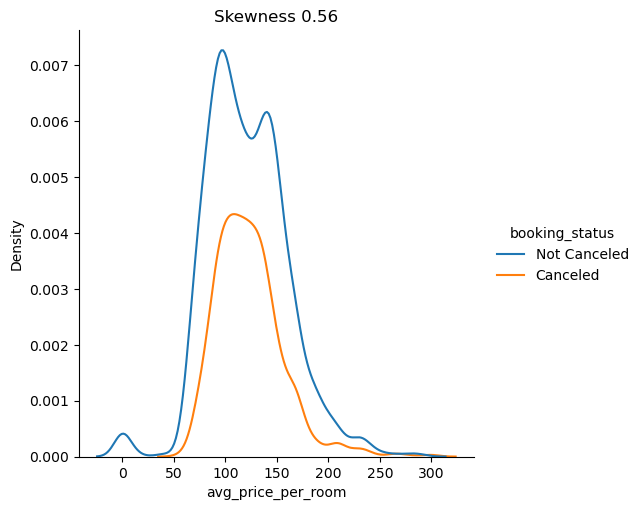

In [17]:
#BIVARITE
# Num Vs Cat                    #when we want to analyse 2 variable

for i in num_cols:
    sns.displot(data=data,x=i,kind='kde',hue='booking_status')
    plt.title(f"Skewness {np.round(data[i].skew(),2)}")
    t += 1
plt.show()

# ENCODING

In [18]:
data["booking_status"] = data["booking_status"].map({"Canceled": 1, "Not Canceled": 0})

In [19]:
data["market_segment_type"]= data["market_segment_type"].map({"Online":1,"Offline":0})

In [20]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,4,1,1,103.00,1,0,2022-07-01,1,1,0
1,147,1,2,103.70,2,2,2022-07-01,0,2,0
2,43,1,1,126.90,2,1,2022-07-01,1,2,0
3,145,0,0,72.76,2,0,2022-07-01,0,1,0
4,86,0,1,107.69,2,1,2022-07-01,0,2,0


# Feature Engineering

In [21]:
data['arrival_date']=pd.to_datetime(data['arrival_date']) 

In [22]:
#extracting month ,date and week day                                       
data['arrival_day']=data['arrival_date'].dt.day
data['arrival_month']=data['arrival_date'].dt.month
data['arrival_weekday']=data['arrival_date'].dt.weekday

In [23]:
data.drop(columns=['arrival_date'],inplace=True)

In [24]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.00,1,0,1,1,0,1,7,4
1,147,1,2,103.70,2,2,0,2,0,1,7,4
2,43,1,1,126.90,2,1,1,2,0,1,7,4
3,145,0,0,72.76,2,0,0,1,0,1,7,4
4,86,0,1,107.69,2,1,0,2,0,1,7,4


In [25]:
# caping the outliers
for i in num_cols:
    q3, q1 = np.percentile(data[i], [75, 25])        #iqr,q3,q1--interqutile range
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr                              # upper limit--for caping outlier
    ll = q1 - 1.5 * iqr                              # lower limit

    # Replace outliers with upper/lower limit
    data[i] = data[i].apply(lambda x: ul if x > ul else (ll if x < ll else x))


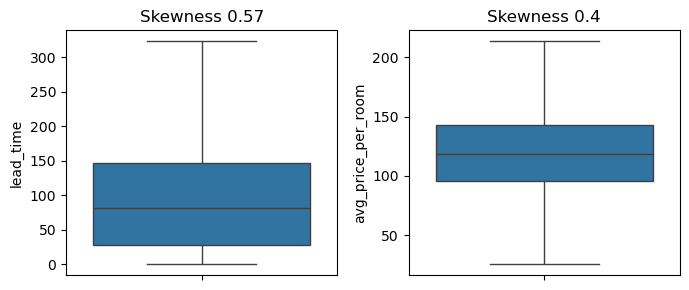

In [26]:
# to check outhliers after removing
t=1
plt.figure(figsize=(7,3))
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data[i])
    plt.title(f"Skewness {np.round(data[i].skew(),2)}")
    t += 1
plt.tight_layout()
plt.show()

In [27]:
from imblearn.over_sampling import SMOTE               #to balance the unbalance proportion of classes

x = data.drop('booking_status', axis=1)
y = data['booking_status']

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


In [28]:
y_resampled.value_counts(normalize=True)              #to see my data after balancing 

booking_status
0    0.5
1    0.5
Name: proportion, dtype: float64

# TRAIN AND TEST

In [51]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop(columns=['booking_status'])
y = data['booking_status']

# Split into train (80%) and test (20%)
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)     #we check the shape after spliting the data

(717, 11) (717,) (2866, 11) (2866,)


In [32]:
#CHECKING IF OUR DATA IS BALANCE OR NOT
y_train.value_counts(normalize=True)

booking_status
0    0.665038
1    0.334962
Name: proportion, dtype: float64

# Model Building

In [33]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x_train, y_train)

# 3. Predict on test set
y_pred = logreg.predict(x_test)

# 4. Evaluate model
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.7921896792189679

📊 Confusion Matrix:
 [[415  62]
 [ 87 153]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       477
           1       0.71      0.64      0.67       240

    accuracy                           0.79       717
   macro avg       0.77      0.75      0.76       717
weighted avg       0.79      0.79      0.79       717



In [34]:
Dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)     #max_depth--how much branches dt has taken
Dt.fit(x_train, y_train)                                          #min_samples_leaf--The minimum number of samples required to be at a leaf node (end of a branch)

# 3. Predict on test set
y_pred =Dt.predict(x_test)

# 4. Evaluate model
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.8521617852161785

📊 Confusion Matrix:
 [[443  34]
 [ 72 168]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       477
           1       0.83      0.70      0.76       240

    accuracy                           0.85       717
   macro avg       0.85      0.81      0.83       717
weighted avg       0.85      0.85      0.85       717



In [35]:
rf_model = RandomForestClassifier(max_depth=10,min_samples_leaf=5,n_estimators=50)
rf_model.fit(x_train, y_train)                           #n_estimator-no. of decision required

# 4. Predict on test set                           
y_pred = rf_model.predict(x_test)

# 5. Evaluate performance
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.8842398884239888

📊 Confusion Matrix:
 [[457  20]
 [ 63 177]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       477
           1       0.90      0.74      0.81       240

    accuracy                           0.88       717
   macro avg       0.89      0.85      0.86       717
weighted avg       0.89      0.88      0.88       717



In [36]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,             #learning-- It shrinks the prediction of each tree before adding it to the final prediction
    max_depth=3)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict
y_pred = xgb_model.predict(x_test)

# Evaluate
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy Score: 0.8940027894002789

📊 Confusion Matrix:
 [[455  22]
 [ 54 186]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       477
           1       0.89      0.78      0.83       240

    accuracy                           0.89       717
   macro avg       0.89      0.86      0.88       717
weighted avg       0.89      0.89      0.89       717



# Hyperparameter Tuning with GridSearchCV

In [37]:
param_grid = {
    'n_estimators': [65,67,70,72],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.09, 0.08]
   }


In [38]:
# 3. Set up GridSearchCV
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [39]:
# 4. Fit the model on training data
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=300,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.09, 0.08],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [65, 67, 70, 72]},
             scoring='accuracy', verbose=1)

In [40]:
# 5. Get the best model
best_model = grid.best_estimator_

In [41]:
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 70}
Accuracy: 0.8940027894002789
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       477
           1       0.89      0.78      0.83       240

    accuracy                           0.89       717
   macro avg       0.89      0.86      0.88       717
weighted avg       0.89      0.89      0.89       717

Confusion Matrix:
 [[455  22]
 [ 54 186]]


# Comparing the train and test accuracy

In [42]:
train_acc = accuracy_score(y_train, best_model.predict(x_train))
test_acc = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9459176552686671
Test Accuracy: 0.8940027894002789


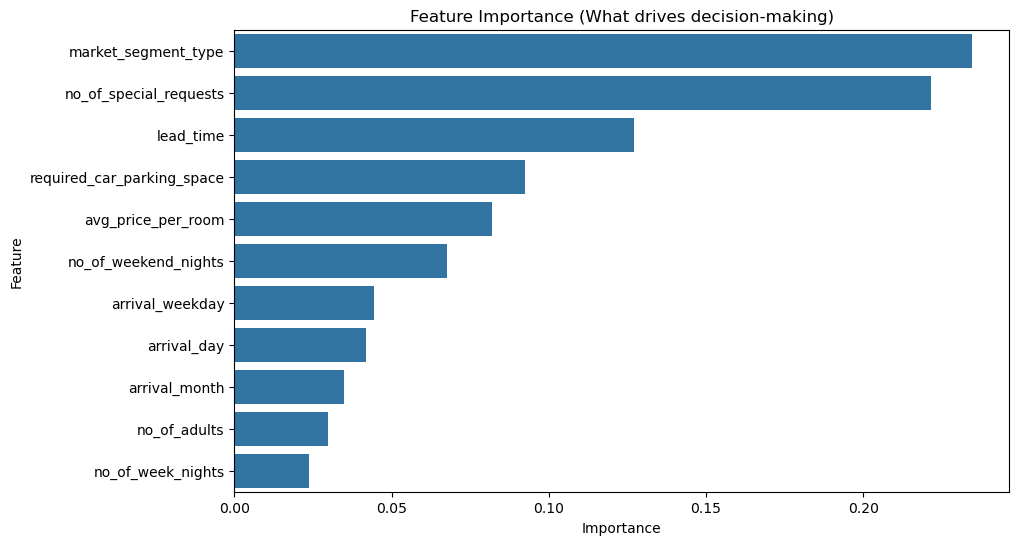

In [43]:
# Plot feature importance
importances = best_model.feature_importances_
feature_names = x_train.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance (What drives decision-making)")
plt.show()


In [44]:
## ✅ 2. Model Accuracy (How well does it predict?)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 89.40%


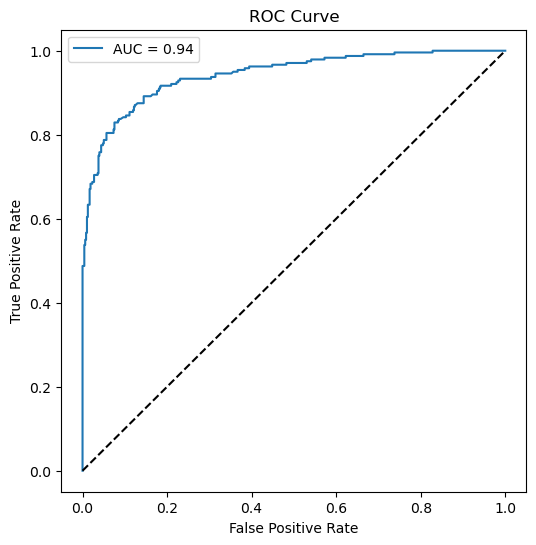

In [48]:
from sklearn.metrics import roc_curve, auc

y_prob = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# 💡 Recommended Actions

## Dynamic Overbooking Strategy

* Use predicted cancellation risk to decide how much to overbook.

* Example: Overbook OTA + long-lead reservations more than corporate bookings.

## Smarter Cancellation Policies

* High-risk guests → require deposits, shorter free-cancel window.

* Low-risk guests → keep flexible policies to maintain satisfaction.

## Targeted Retention Campaigns

* For high-risk bookings:

* Send reminders before cancellation deadlines.

* Offer “keep your price” or small perks (e.g., free breakfast).

* Convert likely cancellations into confirmed stays.

## Revenue Optimization

* Protect peak dates (weekends, holidays) with stricter policies.

* Encourage early payment or upsells for long-lead bookings.

# 🚀 Business Impact

* Reduce revenue leakage by proactively managing high-risk bookings.

* Increase operational efficiency with more accurate occupancy forecasts.

* Improve guest satisfaction by reducing last-minute overbooking surprises.

* Strengthen channel strategy by aligning policies with cancellation behavior.